In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [5]:
# Load the dataset
file_path = 'continuous dataset.csv'  # Update the file path as needed
data = pd.read_csv(file_path)

In [6]:
# Convert the 'datetime' column to a datetime format
data['datetime'] = pd.to_datetime(data['datetime'], format='%d-%m-%Y %H:%M')

In [7]:
# Extracting date and time features
data['hour'] = data['datetime'].dt.hour
data['day_of_week'] = data['datetime'].dt.dayofweek
data['month'] = data['datetime'].dt.month

In [8]:
# Exploratory Data Analysis (EDA)
# List of weather variables and their respective city codes
weather_variables = ['T2M', 'QV2M', 'TQL', 'W2M']
cities = ['toc', 'san', 'dav']

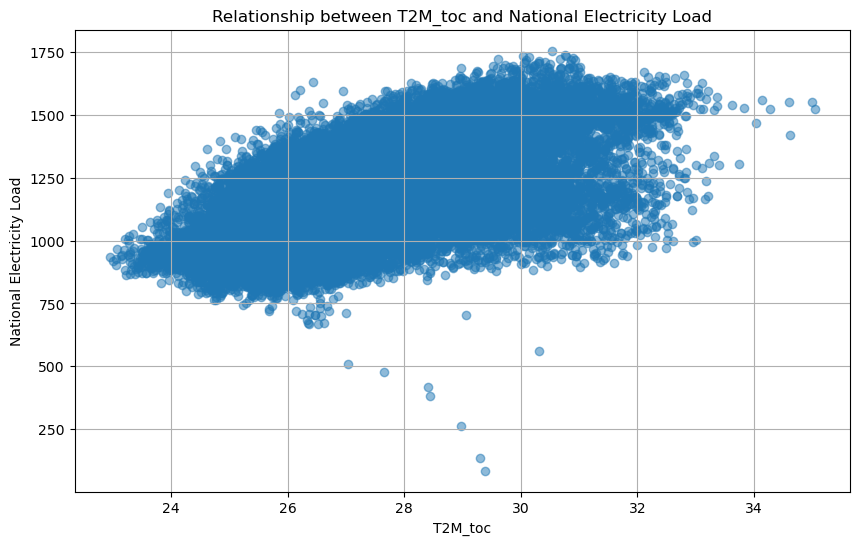

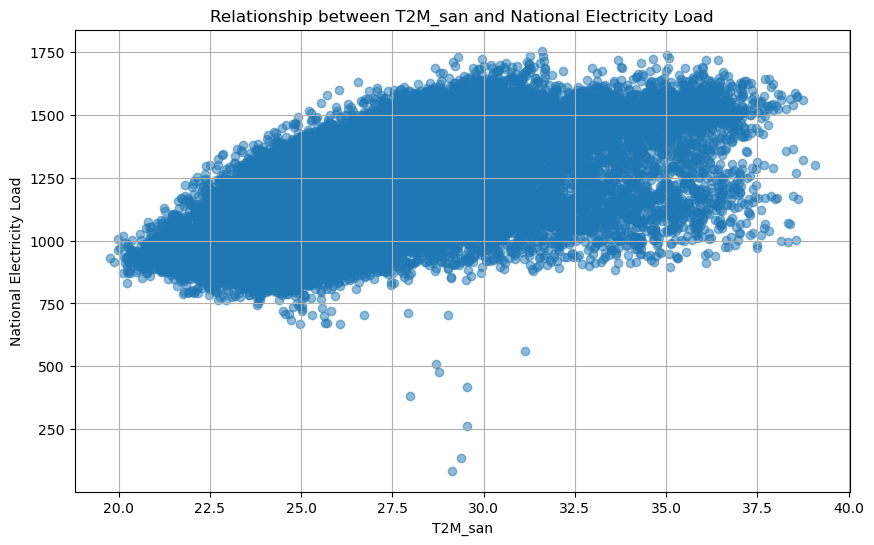

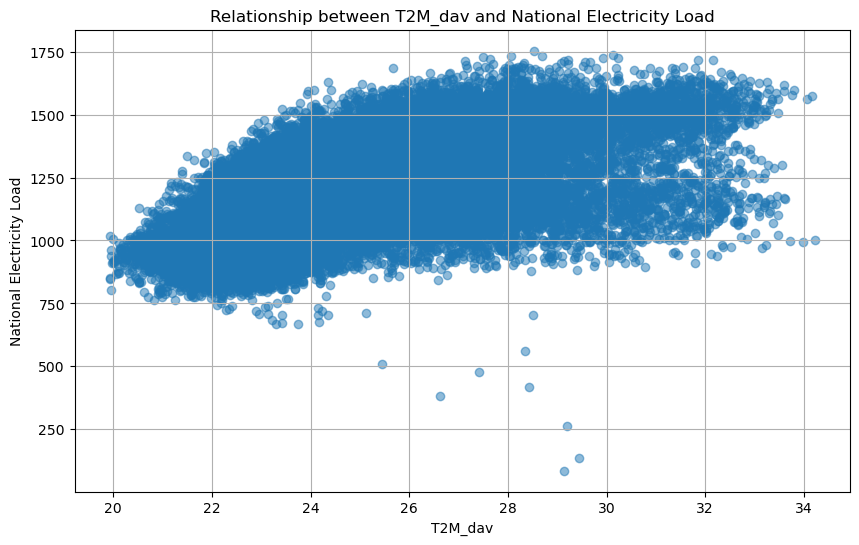

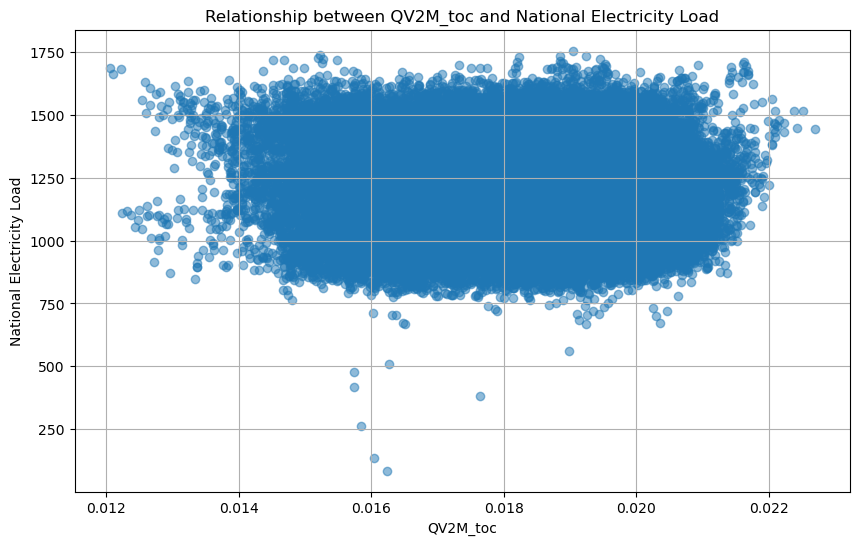

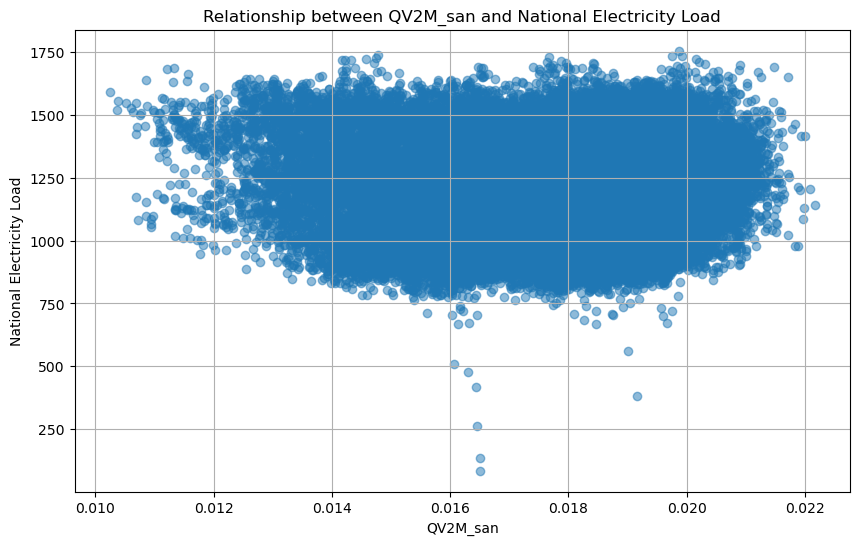

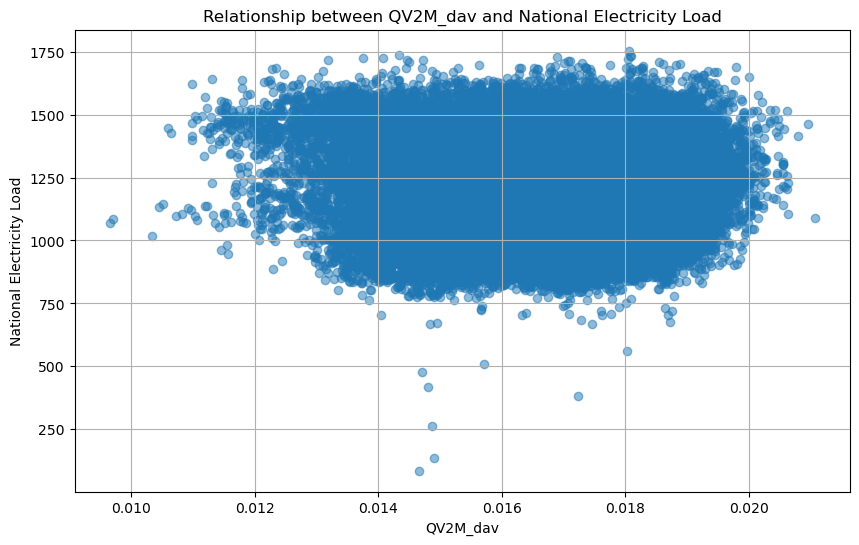

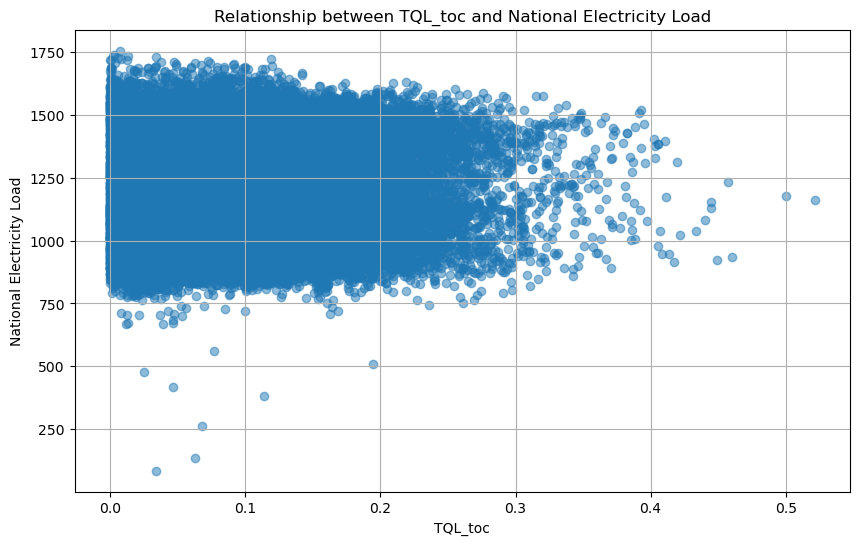

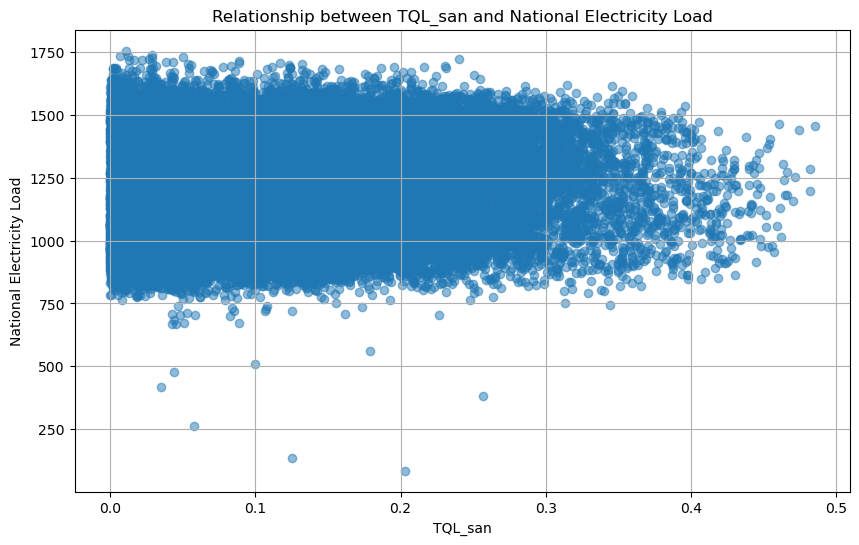

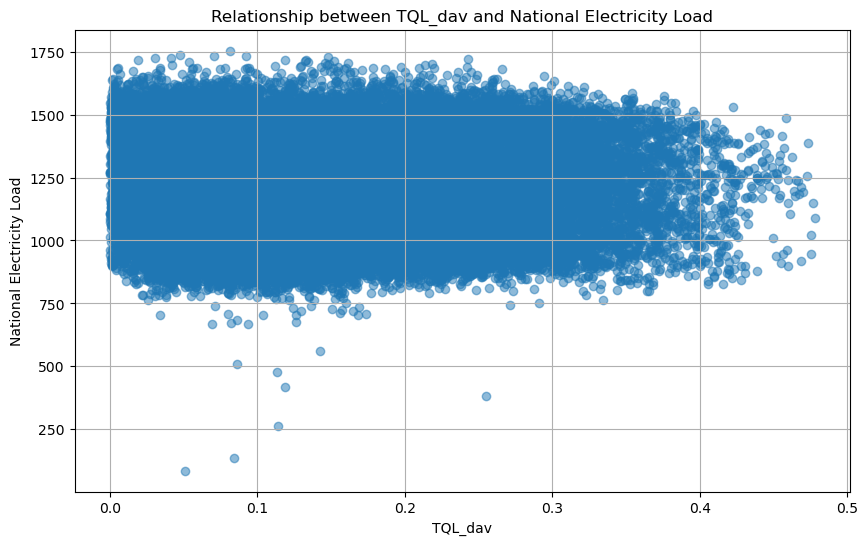

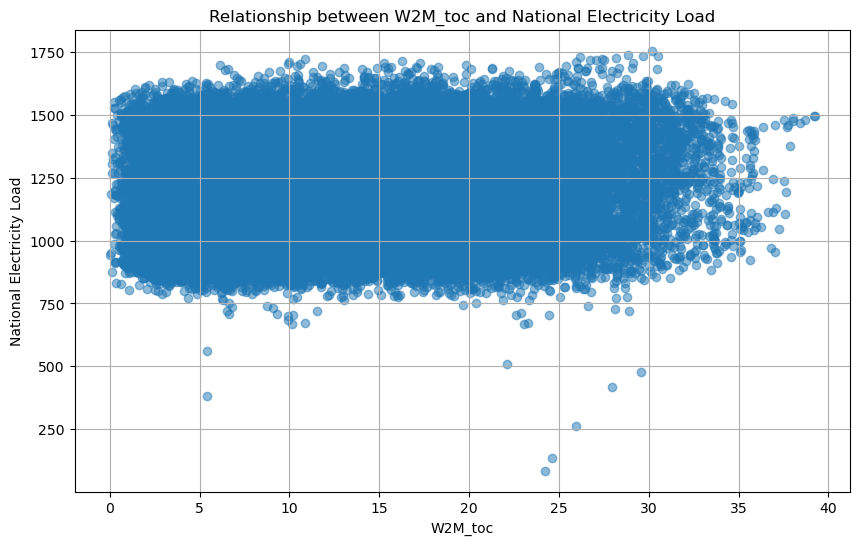

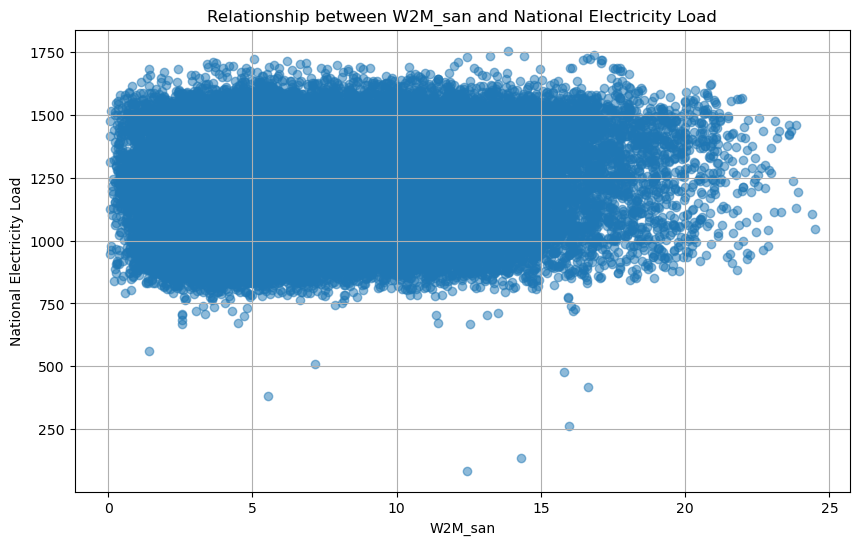

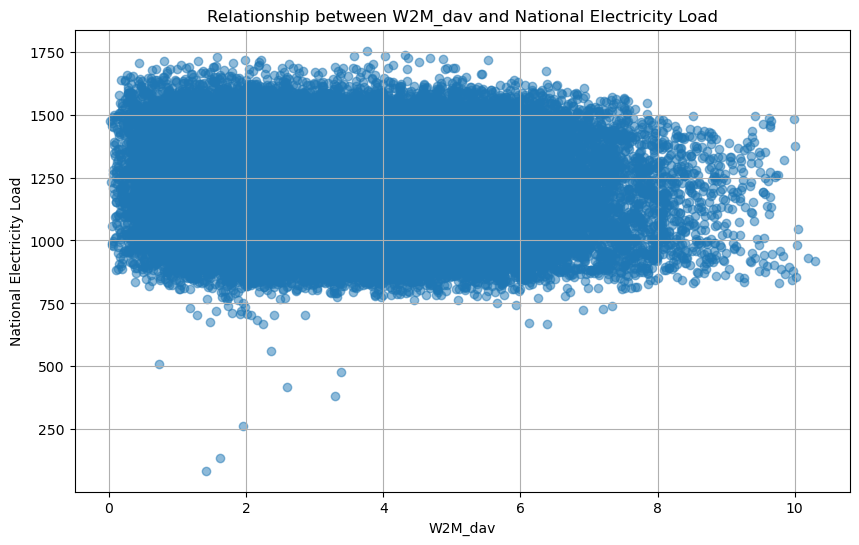

In [9]:
# Scatter plots for each weather variable in each city
for var in weather_variables:
    for city in cities:
        plt.figure(figsize=(10, 6))
        plt.scatter(data[f'{var}_{city}'], data['nat_demand'], alpha=0.5)
        plt.xlabel(f'{var}_{city}')
        plt.ylabel('National Electricity Load')
        plt.title(f'Relationship between {var}_{city} and National Electricity Load')
        plt.grid(True)
        plt.show()
        

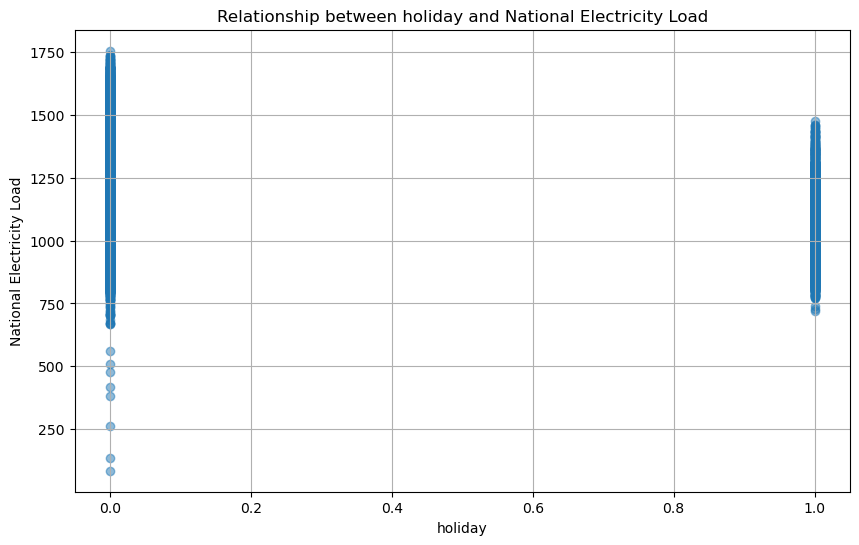

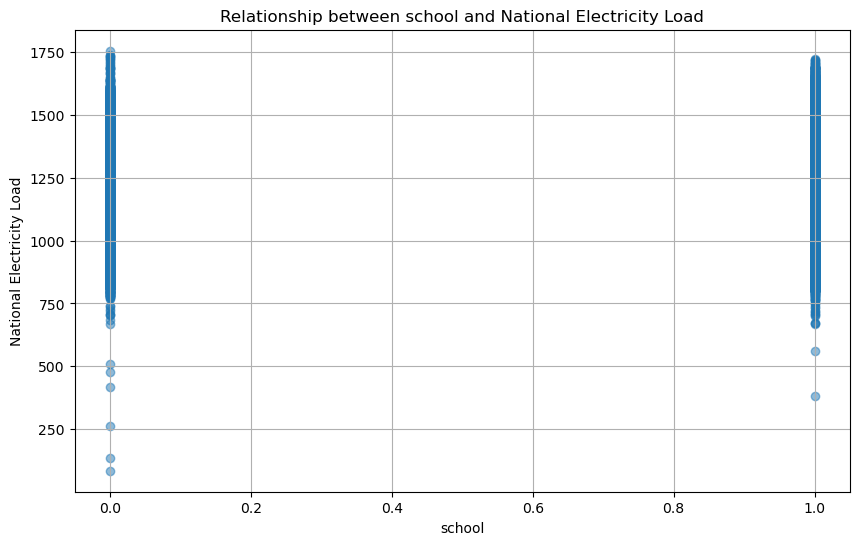

In [10]:
# Scatter plots for binary indicators (holiday and school periods)
binary_indicators = ['holiday', 'school']

for indicator in binary_indicators:
    plt.figure(figsize=(10, 6))
    plt.scatter(data[indicator], data['nat_demand'], alpha=0.5)
    plt.xlabel(indicator)
    plt.ylabel('National Electricity Load')
    plt.title(f'Relationship between {indicator} and National Electricity Load')
    plt.grid(True)
    plt.show()

In [11]:
# Prepare the data for modeling
# Drop unnecessary columns and set up the feature matrix and target vector
X = data.drop(columns=['datetime', 'nat_demand'])
y = data['nat_demand']

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 60.94813417411416


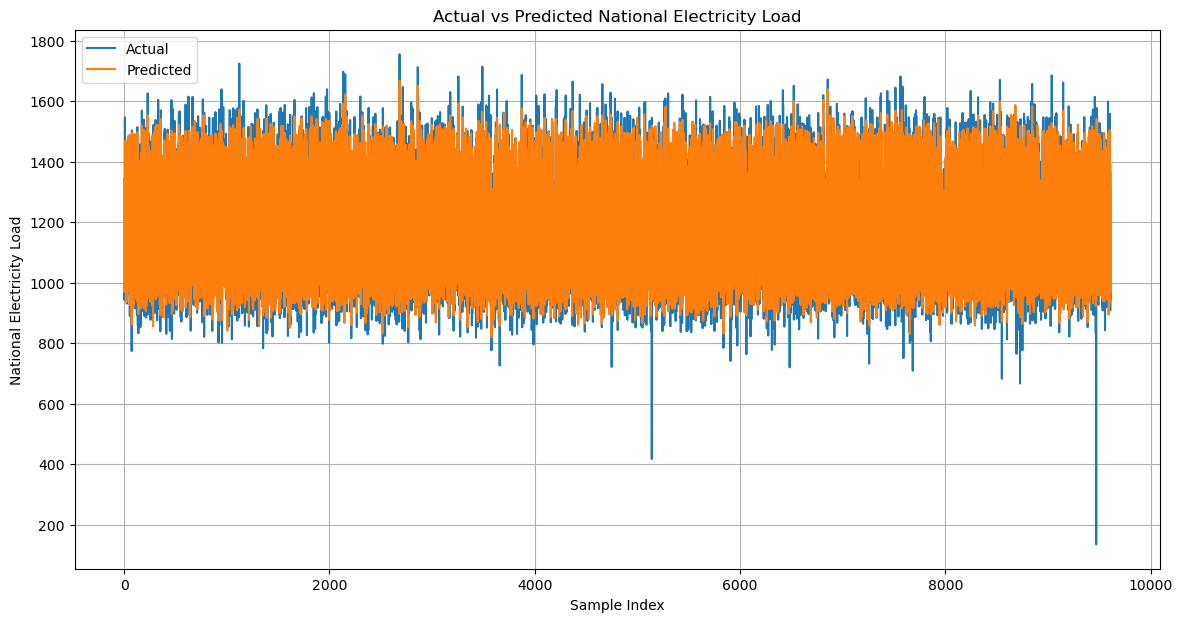

In [14]:

# Make predictions (example for future data, replace X_future with actual future data)
# future_predictions = model.predict(X_future)  # Uncomment and use actual future data for predictions

# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('National Electricity Load')
plt.title('Actual vs Predicted National Electricity Load')
plt.legend()
plt.grid(True)
plt.show()